## The Sparks Foundation Internship Data Science and Business Analytics
## Author : Uktarsh vataliya
### Task 1 : Supervised ML Prediction Model
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.linear_model import LinearRegression

# to ingore warning
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA(Exploratory Data Analysis)

In [3]:
# shape of the dataset
df.shape

(25, 2)

In [4]:
# checking null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### there is no null values

In [5]:
# unique values in dataset
df.nunique()

Hours     23
Scores    23
dtype: int64

In [6]:
# returns statstical analysis in dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


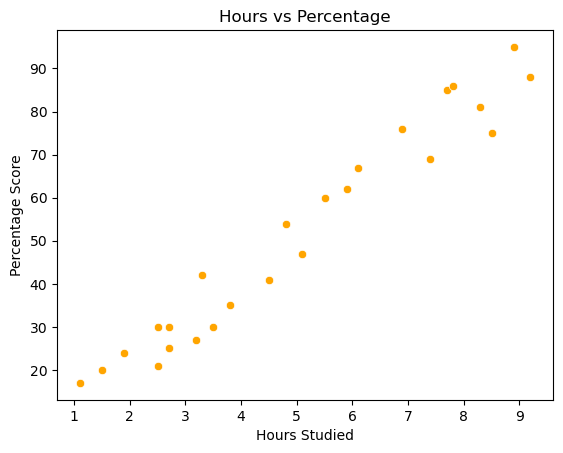

In [7]:
sns.scatterplot(x='Hours',y='Scores',data=df,c='orange')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph , we clearly see linear rrelationship hours and score

### Preparing the data 
devide data into input and output (means x and y)

In [8]:
x = df[['Hours']].values
y = df[['Scores']].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

 the next step is to split this data into training and test sets.

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training the Algorithm

In [12]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print('Training complete ')

Training complete 


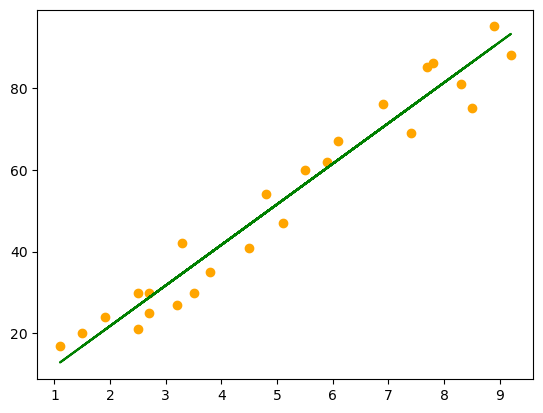

In [13]:
# Plotting the regression line
line = reg.coef_* x + reg.intercept_

# Plotting for the test data
plt.scatter(x,y, c='orange')
plt.plot(x, line, c='green')
plt.show()

### Making Predications

In [14]:
y_pred = reg.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [15]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [16]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [17]:
print('r2 score:', r2_score(y_test,y_pred))

r2 score: 0.9454906892105354


In [18]:
hours = 9.25
pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


## Thank you 